In [1]:
import matplotlib.pyplot as plt
from sklearn import preprocessing as PP
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
cereal_data = pd.read_csv('cereals.csv', na_values=-1).dropna()

In [4]:
cereal_data.tail(10)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
67,Special_K,K,C,110,6,0,230,1,16,3,55,25,1,1.0,1.00
68,Strawberry_Fruit_Wheats,N,C,90,2,0,15,3,15,5,90,25,2,1.0,1.00
69,Total_Corn_Flakes,G,C,110,2,1,200,0,21,3,35,100,3,1.0,1.00
70,Total_Raisin_Bran,G,C,140,3,1,190,4,15,14,230,100,3,1.5,1.00
71,Total_Whole_Grain,G,C,100,3,1,200,3,16,3,110,100,3,1.0,1.00
72,Triples,G,C,110,2,1,250,0,21,3,60,25,3,1.0,0.75
73,Trix,G,C,110,1,1,140,0,13,12,25,25,2,1.0,1.00
74,Wheat_Chex,R,C,100,3,1,230,3,17,3,115,25,1,1.0,0.67
75,Wheaties,G,C,100,3,1,200,3,17,3,110,25,1,1.0,1.00
76,Wheaties_Honey_Gold,G,C,110,2,1,200,1,16,8,60,25,1,1.0,0.75


In [5]:
temp_data = cereal_data
temp_data['weight_norm'] = temp_data.weight.apply(lambda x: (1 / x))
temp_data
s_list = ['calories', 'protien', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'cups']

def normalize(temp_data):
    normalized_data = temp_data[['name', 'mfr', 'type', 'shelf' ]]
    normalized_data = normalized_data
    for series in temp_data:
        if series in s_list:
            normalized_data[series] = temp_data[series].multiply(temp_data.weight_norm)
    return normalized_data

adjusted_data = normalize(temp_data)
adjusted_data.head()


/Users/lancerogers/Iron_Yard/.direnv/python-3.4.2/lib/python3.4/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,mfr,type,shelf,calories,fat,sodium,fiber,carbo,sugars,potass,vitamins,cups
0,100%_Bran,N,C,3,70,1,130,10.0,5.0,6,280,25,0.33
1,100%_Natural_Bran,Q,C,3,120,5,15,2.0,8.0,8,135,0,1.00
2,All-Bran,K,C,3,70,1,260,9.0,7.0,5,320,25,0.33
3,All-Bran_with_Extra_Fiber,K,C,3,50,0,140,14.0,8.0,0,330,25,0.50
5,Apple_Cinnamon_Cheerios,G,C,1,110,2,180,1.5,10.5,10,70,25,0.75


In [6]:
adjusted_data.index = adjusted_data.name
adjusted_data.head()

,name,mfr,type,shelf,calories,fat,sodium,fiber,carbo,sugars,potass,vitamins,cups
name,,,,,,,,,,,,,
100%_Bran,100%_Bran,N,C,3,70,1,130,10.0,5.0,6,280,25,0.33
100%_Natural_Bran,100%_Natural_Bran,Q,C,3,120,5,15,2.0,8.0,8,135,0,1.00
All-Bran,All-Bran,K,C,3,70,1,260,9.0,7.0,5,320,25,0.33
All-Bran_with_Extra_Fiber,All-Bran_with_Extra_Fiber,K,C,3,50,0,140,14.0,8.0,0,330,25,0.50
Apple_Cinnamon_Cheerios,Apple_Cinnamon_Cheerios,G,C,1,110,2,180,1.5,10.5,10,70,25,0.75


In [7]:
def get_dict(groupby_obj):
    keys = []
    val = 1
    x = len(groupby_obj) + 1
    while val < x:
        for key in groupby_obj.groups:
            keys.append((key, val))
            val += 1
    return {el:v for el,v in keys}

In [8]:
mfr = adjusted_data.groupby('mfr')
mfr_d = get_dict(mfr)

name = adjusted_data.groupby('name')
name_d = get_dict(name)

type_o = adjusted_data.groupby('type')
type_d = get_dict(type_o)

In [9]:
adjusted_data = adjusted_data.replace({'name': name_d, 'mfr': mfr_d, 'type': type_d})

In [11]:
adjusted_data.head()




,name,mfr,type,shelf,calories,fat,sodium,fiber,carbo,sugars,potass,vitamins,cups
name,,,,,,,,,,,,,
100%_Bran,20,2,2,3,70,1,130,10.0,5.0,6,280,25,0.33
100%_Natural_Bran,62,6,2,3,120,5,15,2.0,8.0,8,135,0,1.00
All-Bran,55,3,2,3,70,1,260,9.0,7.0,5,320,25,0.33
All-Bran_with_Extra_Fiber,60,3,2,3,50,0,140,14.0,8.0,0,330,25,0.50
Apple_Cinnamon_Cheerios,50,5,2,1,110,2,180,1.5,10.5,10,70,25,0.75


In [12]:
adjusted_data.corr()

,name,mfr,type,shelf,calories,fat,sodium,fiber,carbo,sugars,potass,vitamins,cups
name,1.000000,0.019646,-0.073973,0.006890,-0.118771,0.028634,-0.015125,0.012842,-0.121447,0.038718,0.054083,-0.013726,-0.010763
mfr,0.019646,1.000000,0.257462,0.140701,0.215902,0.287471,0.128203,-0.190254,-0.129524,0.219340,-0.117679,-0.043090,0.066335
type,-0.073973,0.257462,1.000000,0.030621,0.033627,-0.005705,0.224276,0.104284,-0.040544,0.107852,-0.002480,0.015137,-0.063584
shelf,0.006890,0.140701,0.030621,1.000000,-0.081281,0.242811,-0.189475,0.282513,-0.227429,-0.011630,0.369512,0.248498,-0.254103
calories,-0.118771,0.215902,0.033627,-0.081281,1.000000,0.491052,0.122947,-0.665157,0.213262,0.379533,-0.548822,0.049351,0.259881
fat,0.028634,0.287471,-0.005705,0.242811,0.491052,1.000000,-0.015575,-0.016069,-0.381111,0.271429,0.160523,-0.049387,-0.194895
sodium,-0.015125,0.128203,0.224276,-0.189475,0.122947,-0.015575,1.000000,-0.138606,0.148051,-0.020790,-0.161686,0.335696,-0.051760
fiber,0.012842,-0.190254,0.104284,0.282513,-0.665157,-0.016069,-0.138606,1.000000,-0.426466,-0.275259,0.919284,-0.098043,-0.424328
carbo,-0.121447,-0.129524,-0.040544,-0.227429,0.213262,-0.381111,0.148051,-0.426466,1.000000,-0.635888,-0.481377,0.090933,0.565170
sugars,0.038718,0.219340,0.107852,-0.011630,0.379533,0.271429,-0.020790,-0.275259,-0.635888,1.000000,-0.198641,-0.005375,-0.182667


In [16]:
clean_data = PP.scale(adjusted_data)



In [17]:
pca = PCA(n_components=None)
pca.fit(clean_data)
reduced_data = pca.transform(clean_data)


In [18]:
reduced_data.shape


(74, 13)

In [28]:
kmeans = KMeans(6)
y_pred = kmeans.fit_predict(reduced_data)

In [29]:
y_pred

array([5, 1, 5, 5, 2, 2, 1, 3, 1, 2, 3, 2, 1, 2, 3, 3, 2, 2, 1, 3, 1, 3, 2,
       2, 3, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 0, 3, 1, 2, 4, 1, 1, 1, 3,
       2, 1, 3, 1, 1, 0, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 3, 3, 0, 1, 0,
       3, 2, 3, 3, 2], dtype=int32)

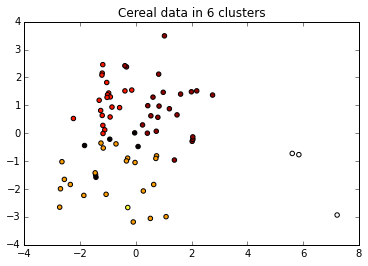

In [30]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_pred, cmap="hot")
plt.title("Cereal data in 6 clusters")
plt.show()